<IPython.core.display.Javascript object>


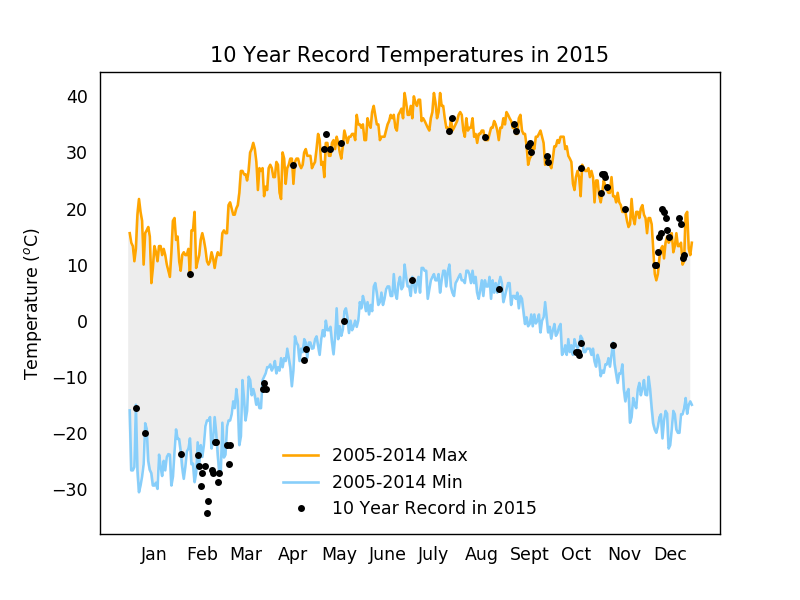

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv('ann-arbor-weather-2005-2015.csv')


df['Datetime'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


df['Month']=df['Datetime'].dt.month
df['Day']=df['Datetime'].dt.day

df=df.sort_values('Date')
df = df.loc[~((df['Month'] == 2) & (df['Day'] == 29)),:]
df['Day_of_Year'] = df['Datetime'].dt.dayofyear
df['is_leap_year']=df['Datetime'].dt.is_leap_year

df['corrected_dayofyear'] = np.where(df['is_leap_year'] & (df['Day_of_Year']>60), df['Day_of_Year']-1, df['Day_of_Year'])
df_2015=df[(df['Datetime']>='2015')]
df=df[(df['Datetime']<'2015')]

df_max=df[(df['Element'] == 'TMAX')]
df_max=df_max.groupby(by=['corrected_dayofyear']).max()


df_min=df[(df['Element'] == 'TMIN')]
df_min=df_min.groupby(by=['corrected_dayofyear']).min()

df_2015_max=df_2015[(df_2015['Element'] == 'TMAX')]
df_2015_max=df_2015_max.groupby(by=['corrected_dayofyear']).max()

df_2015_min=df_2015[(df_2015['Element'] == 'TMIN')]
df_2015_min=df_2015_min.groupby(by=['corrected_dayofyear']).min()

df_w15_max = df_max
df_w15_max['2015']=df_2015_max['Data_Value']
df_w15_max['2015_max']=np.where(df_w15_max['2015'] > df_w15_max['Data_Value'], df_w15_max['2015'], np.nan)
df_w15_max

df_w15_min = df_min
df_w15_min['2015']=df_2015_min['Data_Value']
df_w15_min['2015_min']=np.where(df_w15_min['2015'] < df_w15_min['Data_Value'], df_w15_min['2015'], np.nan)

plt.figure()

plt.plot(df_max.index,(df_max['Data_Value']/10).astype(float),'-', color='orange')
plt.plot(df_min.index,(df_min['Data_Value']/10).astype(float),'-',color='lightskyblue')
plt.gca().fill_between(range(len(df_max['Data_Value'])),df_max['Data_Value']/10, df_min['Data_Value']/10, facecolor='lightgray', alpha=0.4)
plt.plot(df_w15_max.index,(df_w15_max['2015_max']/10).astype(float),'.',color='black')
plt.plot(df_w15_min.index,(df_w15_min['2015_min']/10).astype(float),'.',color='black')

plt.ylabel('Temperature ($^o$C)')
plt.title('10 Year Record Temperatures in 2015')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelbottom='on')
plt.legend(['2005-2014 Max','2005-2014 Min','10 Year Record in 2015'],frameon=False)

m = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
# This is the vital step. It will create a list of day numbers corresponding to middle of each month i.e. 15(Jan), 46(Feb), ... 
ticks = [(datetime.date(2017,m,1)-datetime.date(2016,12,15)).days for m in range(1,13)]
# It is important to use a non-leap year for this calculation (I used 2017).
# Also, I used (2016,12,15) to substract so that I get middle of each month rather than beginning, it just looks better that way.
ax=plt.gca()
ax.set_xticks(ticks)
ax.set_xticklabels(m)
